# 线性回归

线性回归(Linear regression)是利用回归方程(函数)对一个或多个自变量(特征值)和因变量(目标值)之间关系进行建模的一种分析方式。

特点：只有一个自变量的情况称为单变量回归，大于一个自变量情况的叫做多元回归

## 1. 最小二乘代数法解法

使$J$最小，方法就是对$\theta_0$和$\theta_1$分别来求偏导数，令偏导数为0，得到一个关于$\theta_0$和$\theta_1$的二元方程组。求解这个二元方程组，就可以得到$\theta_0$和$\theta_1$的值。

$\theta_0 = \sum\limits_{i=1}^{m}\big(x^{(i)})^2\sum\limits_{i=1}^{m}y^{(i)} - \sum\limits_{i=1}^{m}x^{(i)}\sum\limits_{i=1}^{m}x^{(i)}y^{(i)} \Bigg/ m\sum\limits_{i=1}^{m}\big(x^{(i)})^2 - \big(\sum\limits_{i=1}^{m}x^{(i)})^2$

$\theta_1 = m\sum\limits_{i=1}^{m}x^{(i)}y^{(i)} - \sum\limits_{i=1}^{m}x^{(i)}\sum\limits_{i=1}^{m}y^{(i)} \Bigg/ m\sum\limits_{i=1}^{m}\big(x^{(i)})^2 - \big(\sum\limits_{i=1}^{m}x^{(i)})^2$

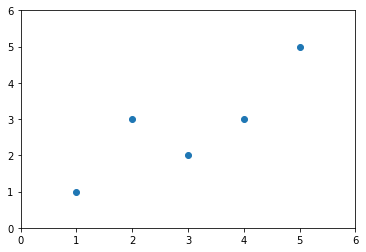

In [64]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[1.], [2.], [3.], [4.], [5.]])
y = np.array([1., 3., 2., 3., 5.])

plt.scatter(X, y)
plt.axis([0, 6, 0, 6])
plt.show()

In [66]:
X_mean = np.mean(X)
y_mean = np.mean(y)

theta_1 = (np.mean(X.T*y)-X_mean*y_mean)/(np.mean(X**2) - X_mean**2)
theta_0 = y_mean - theta_1*X_mean

print("theta_1:",theta_1)
print("theta_0:",theta_0)
print("回归模型为：y="+str(theta_1)+"x+"+str(theta_0))

theta_1: 0.8000000000000007
theta_0: 0.3999999999999977
回归模型为：y=0.8000000000000007x+0.3999999999999977


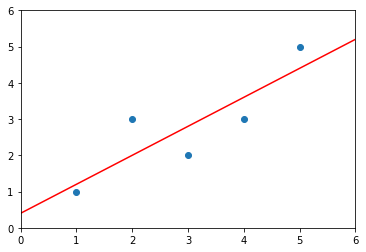

In [105]:
X_line = np.linspace(0,6,7)
y_line = theta_1 * X_line + theta_0

plt.scatter(X, y)
plt.plot(X_line, y_line, color='r')
plt.axis([0, 6, 0, 6])
plt.show()

## 2. 最小二乘矩阵法解法

损失函数定义为$J(\mathbf\theta) = \frac{1}{2}(\mathbf{X\theta} - \mathbf{Y})^T(\mathbf{X\theta} - \mathbf{Y})$

根据最小二乘法的原理，我们要对这个损失函数对$\theta$向量求导取0。结果如下式：

$\frac{\partial}{\partial\mathbf\theta}J(\mathbf\theta) = \mathbf{X}^T(\mathbf{X\theta} - \mathbf{Y}) = 0$

对上述求导等式整理后可得：

$\mathbf{X^{T}X\theta} = \mathbf{X^{T}Y}$

两边同时左乘$(\mathbf{X^{T}X})^{-1}$，可得：

$\mathbf{\theta} = (\mathbf{X^{T}X})^{-1}\mathbf{X^{T}Y}$

In [106]:
X = np.array([[1.], [2.], [3.], [4.], [5.]])
y = np.array([1., 3., 2., 3., 5.])

X = np.hstack((X,np.ones((len(X),1))))
theta = np.linalg.inv(np.dot(X.T,X))
theta = np.dot(np.dot(theta,X.T),y)
print(theta)

print("theta_1:",theta_1)
print("theta_0:",theta_0)
print("回归模型为：y="+str(theta_1)+"x+"+str(theta_0))

[0.8 0.4]
theta_1: 0.8000000000000007
theta_0: 0.3999999999999977
回归模型为：y=0.8000000000000007x+0.3999999999999977


## 3、最小二乘法封装成类使用

In [253]:
class SimpleLinearRegression:

    def __init__(self):
        self.theta = None

    def fit(self, x_train, y_train):
        x_train = np.hstack((x_train, np.ones((len(x_train),1))))
        theta = np.linalg.inv(np.dot(x_train.T,x_train))
        self.theta = np.dot(np.dot(theta,x_train.T),y_train)

    def predict(self, x_predict):
        x_predict = np.hstack((x_predict,np.ones((len(x_predict),1))))
        return np.dot(x_predict,self.theta)

[0.79978115 0.40079013]


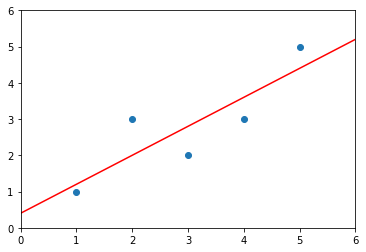

In [236]:
X = np.array([[1.], [2.], [3.], [4.], [5.]])
y = np.array([1., 3., 2., 3., 5.])

reg1 = SimpleLinearRegression()
reg1.fit(X, y)
print(reg1.theta)

X_line = np.linspace(0,6,7).reshape(-1,1)
plt.scatter(X, y)
plt.plot(X_line, reg1.predict(X_line), color='r')
plt.axis([0, 6, 0, 6])
plt.show()

In [260]:
# boston数据集
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X,y = load_boston(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=0)

reg = SimpleLinearRegression()
reg.fit(X_train, y_train)
print(reg.theta)

y_pred = reg.predict(X_test)
MSE_test = mean_squared_error(y_test,y_pred)
print("测试集MSE:",MSE_test)

[-1.17735289e-01  4.40174969e-02 -5.76814314e-03  2.39341594e+00
 -1.55894211e+01  3.76896770e+00 -7.03517828e-03 -1.43495641e+00
  2.40081086e-01 -1.12972810e-02 -9.85546732e-01  8.44443453e-03
 -4.99116797e-01  3.69332555e+01]
测试集MSE: 29.782245092295227


## 4、梯度下降法使用

损失函数对$\theta$向量求偏导。结果如下式：

$\frac{\partial}{\partial\mathbf\theta}J(\mathbf\theta) = \mathbf{X}^T(\mathbf{X\theta} - \mathbf{Y})$

梯度下降的迭代公式为：

$\theta  := \theta - \alpha \cdot \mathbf{X}^T(\mathbf{X\theta} - \mathbf{Y})$

把损失函数想象成一个山坡，目标是找到山坡最低的点。则随便选一个起点，计算损失函数对于参数矩阵在该点的偏导数，每次往偏导数的反向向走一步，步长通过$\alpha$来控制，直到走到最低点，即导数趋近于0的点为止

缺点：最小点的时候收敛速度变慢，并且对初始点的选择极为敏感

梯度下降有时会陷入局部最优解的问题中，即下山的路上有好多小坑，运气不好掉进坑里，但是由于底部梯度(导数)也为0，故以为找到了山的底部
同时，步长选择的过大或者过小，都会影响模型的计算精度及计算效率

In [281]:
class SimpleLinearRegression:

    def __init__(self):
        self.theta = None

    def fit(self, X_train, y_train, learning_rate=0.02, n_iters=1e5, epsilon=1e-8):
        #计算目标函数
        def J(theta):
            return 1/2.0*np.sum((np.dot(X_train, theta) - y_train)**2)
        
        #计算梯度
        def dJ(theta):
            return np.dot(X_train.T, np.dot(X_train, theta) - y_train)
        
        X_train = np.hstack((X_train, np.ones((len(X_train),1))))
        last_theta = np.ones((X_train.shape[1]))
        learning_rate = learning_rate/np.mean(np.square(X_train), axis=0) # 统一量纲。也可以对数据先进行归一化
        cur_iter = 0
        while cur_iter < n_iters:
            gradient = dJ(last_theta) # 计算梯度
            theta = last_theta - learning_rate * gradient # 更新参数
            if (abs(J(theta) - J(last_theta)) < epsilon):  #目标函数更新小于一个足够小的值，则迭代结束
                break
            last_theta = theta
            cur_iter += 1
        self.theta = theta

    def predict(self, x_predict):
        x_predict = np.hstack((x_predict,np.ones((len(x_predict),1))))
        return np.dot(x_predict,self.theta)

In [289]:
X = np.array([[1.], [2.], [3.], [4.], [5.]])
y = np.array([1., 3., 2., 3., 5.])

reg = SimpleLinearRegression()
reg.fit(X, y, learning_rate=0.2)
print(reg.theta)

[0.79998041 0.39992816]


In [296]:
X,y = load_boston(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

reg = SimpleLinearRegression()
reg.fit(X_train, y_train, learning_rate=0.0005, n_iters=1e5, epsilon=1e-8)
print(reg.theta)

y_pred = reg.predict(X_test)
MSE_test = mean_squared_error(y_test,y_pred)
print("测试集MSE:",MSE_test)

[-1.17734882e-01  4.40178624e-02 -5.77547915e-03  2.39344741e+00
 -1.55859912e+01  3.76946414e+00 -7.03797564e-03 -1.43485942e+00
  2.40050921e-01 -1.12967750e-02 -9.85425394e-01  8.44549626e-03
 -4.99090479e-01  3.69252279e+01]
测试集MSE: 29.782330851657356


## 5、SKlearn调用线性回归

In [313]:
from sklearn.linear_model import LinearRegression

X,y = load_boston(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

reg = LinearRegression()
reg.fit(X_train, y_train)
print(reg.coef_)
print(reg.intercept_)

y_pred = reg.predict(X_test)
MSE_test = mean_squared_error(y_test,y_pred)
print("测试集MSE:",MSE_test)

[-1.17735289e-01  4.40174969e-02 -5.76814314e-03  2.39341594e+00
 -1.55894211e+01  3.76896770e+00 -7.03517828e-03 -1.43495641e+00
  2.40081086e-01 -1.12972810e-02 -9.85546732e-01  8.44443453e-03
 -4.99116797e-01]
36.93325545711948
测试集MSE: 29.782245092303484


## 6、前向逐步选择法

In [323]:
from sklearn.linear_model import LinearRegression

X,y = load_boston(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

num_feature = X_train.shape[1]
feature_li = []
last_mse = 1000
for j in range(num_feature):
    mse_dic = {}
    for i in range(num_feature):
        if i in feature_li: continue
        feature = feature_li + [i]
        X_in = X_train[:,feature]
        reg = LinearRegression()
        reg.fit(X_in, y_train) 
        y_pred = reg.predict(X_in)
        mse_dic[i] = mean_squared_error(y_train, y_pred)
    max_feat = min(mse_dic, key=mse_dic.get)
    if mse_dic[max_feat] < last_mse:
        last_mse = mse_dic[max_feat]
        feature_li.append(max_feat)
        print("第"+str(j+1)+"轮MSE：",last_mse)
        
        #计算测试集MSE
#         X_in = X_train[:,feature_li]
#         reg = LinearRegression()
#         reg.fit(X_in, y_train) 
#         y_pred = reg.predict(X_test[:,feature_li])
#         MSE_test = mean_squared_error(y_test,y_pred)
#         print("第"+str(j+1)+"轮测试MSE：",MSE_test)      
    else:
        break

print("挑选后的特征集合：",feature_li)
print("挑选特征后的训练集MSE：",last_mse)

第1轮MSE： 36.5600733782031
第2轮MSE： 29.023170613085806
第3轮MSE： 24.186023274469267
第4轮MSE： 23.392224341508868
第5轮MSE： 22.739617883212972
第6轮MSE： 21.43761428932315
第7轮MSE： 20.995940376351047
第8轮MSE： 20.70924799084877
第9轮MSE： 20.370268315074984
第10轮MSE： 20.209728663127922
第11轮MSE： 19.652754653283097
第12轮MSE： 19.640921256893932
第13轮MSE： 19.640519427908043
挑选后的特征集合： [12, 5, 10, 11, 7, 4, 3, 1, 0, 8, 9, 6, 2]
挑选特征后的训练集MSE： 19.640519427908043


In [324]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes

X,y = load_diabetes(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

num_feature = X_train.shape[1]
feature_li = []
last_mse = 100000
for j in range(num_feature):
    mse_dic = {}
    for i in range(num_feature):
        if i in feature_li: continue
        feature = feature_li + [i]
        X_in = X_train[:,feature]
        reg = LinearRegression()
        reg.fit(X_in, y_train) 
        y_pred = reg.predict(X_in)
        mse_dic[i] = mean_squared_error(y_train, y_pred)
    max_feat = min(mse_dic, key=mse_dic.get)
    if mse_dic[max_feat] < last_mse:
        last_mse = mse_dic[max_feat]
        feature_li.append(max_feat)
        print("第"+str(j+1)+"轮MSE：",last_mse)
        
        #计算测试集MSE
#         X_in = X_train[:,feature_li]
#         reg = LinearRegression()
#         reg.fit(X_in, y_train) 
#         y_pred = reg.predict(X_test[:,feature_li])
#         MSE_test = mean_squared_error(y_test,y_pred)
#         print("第"+str(j+1)+"轮测试MSE：",MSE_test)       
    else:
        break

print("挑选后的特征集合：",feature_li)
print("挑选特征后的训练集MSE：",last_mse)

第1轮MSE： 3808.2348869709485
第2轮MSE： 3086.4515101200313
第3轮MSE： 2994.0171958442024
第4轮MSE： 2901.7351853255327
第5轮MSE： 2864.796932911645
第6轮MSE： 2791.9033007274625
第7轮MSE： 2788.359742836528
第8轮MSE： 2784.3341573838056
第9轮MSE： 2781.3583315975375
第10轮MSE： 2780.062316059081
挑选后的特征集合： [2, 8, 4, 3, 1, 6, 7, 5, 0, 9]
挑选特征后的训练集MSE： 2780.062316059081


## 作业：参考前向逐步选择法，实现逐步回归法